In [ ]:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [159]:
df=pd.read_csv('heart.csv')


In [161]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [162]:
df.shape

(1025, 14)

In [163]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [175]:
y=df.iloc[:,-1]

In [176]:
X=df.iloc[:,:-1]

In [177]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [178]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
y_test.value_counts()

(717, 13) (717,)
(308, 13) (308,)


1    154
0    154
Name: target, dtype: int64

In [179]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [180]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

''

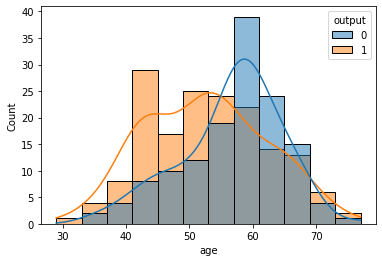

In [122]:
sns.histplot(x='age',data=df,hue='output',kde=True)
;

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


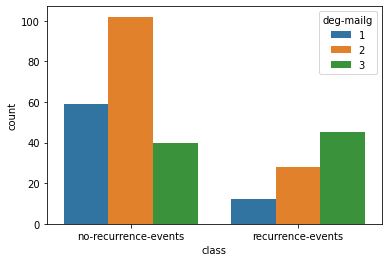

In [12]:
sns.countplot('class',data=df,hue='deg-mailg')

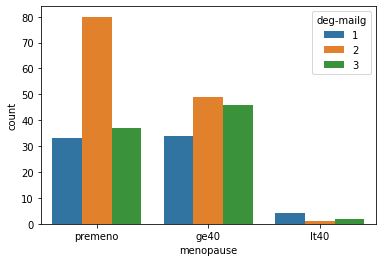

In [15]:
sns.countplot('menopause',data=df,hue='deg-mailg')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


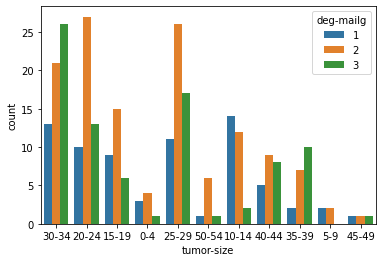

In [16]:
sns.countplot('tumor-size',data=df,hue='deg-mailg')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


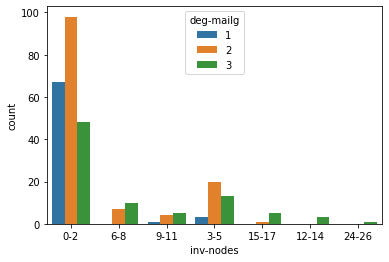

In [17]:
sns.countplot('inv-nodes',data=df,hue='deg-mailg')

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['gini', "entropy"],
    'max_depth': [i for i in range(5, 51, 5)], # [30, 50, 60, 100]
    'min_samples_leaf': [i for i in range(2, 11, 1)], # [2, 3, 5, 10]
    'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5] # [0.1, 0.2, 0.5]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6) # default scoring: accuracy_score
grid_dt.fit(X_train, y_train)
print('Best DT Classifier:', grid_dt.best_params_, 'Best Score:', grid_dt.best_score_) 

Best DT Classifier: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} Best Score: 0.7364729225023342


In [182]:
dt_final=grid_dt.best_estimator_
dt_final.score(X_test,y_test)

0.7564935064935064

In [183]:
y_test.value_counts()

1    154
0    154
Name: target, dtype: int64

In [184]:
from sklearn.metrics import confusion_matrix
y_pred = dt_final.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 85,  69],
       [  6, 148]])

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [185]:
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_logreg = {
    'penalty': ['l1','l2'],
    'C': [c / 10.0 for c in range(1, 10, 1)] + list(range(1, 11, 1)), # [30, 50, 60, 100]
}
grid_logreg = GridSearchCV(LogisticRegression(), param_grid=param_logreg, cv=5) # default scoring: accuracy_score
grid_logreg.fit(X_train, y_train)
print('Best LogReg Classifier:', grid_logreg.best_params_, 'Best Score:', grid_logreg.best_score_)  


Best LogReg Classifier: {'C': 0.1, 'penalty': 'l2'} Best Score: 0.8353923853923855


In [186]:
log_final=grid_logreg.best_estimator_
log_final.score(X_test,y_test)

0.8344155844155844

In [187]:
from sklearn.metrics import confusion_matrix
y_pred = log_final.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[130,  24],
       [ 27, 127]])

In [188]:
# 3. Linear SVC
from sklearn.svm import LinearSVC

param_svc = {
    "penalty": ["l1", "l2"],
    "C": list(range(1, 10)) + list(range(10, 101, 10)), 
    "max_iter": list(range(1000, 5001, 500))
}

grid_svc = GridSearchCV(LinearSVC(), param_grid=param_svc, cv=5) # default scoring: accuracy_score
grid_svc.fit(X_train, y_train)
print('Best LogReg Classifier:', grid_svc.best_params_, 'Best Score:', grid_svc.best_score_)  

Best LogReg Classifier: {'C': 20, 'max_iter': 2000, 'penalty': 'l2'} Best Score: 0.8451534576534577


In [189]:
svc_final=grid_svc.best_estimator_
svc_final.score(X_test,y_test)

0.8344155844155844

In [190]:
from sklearn.metrics import confusion_matrix
y_pred = svc_final.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[130,  24],
       [ 27, 127]])

In [191]:
# 5. Random Forest
from sklearn.ensemble import RandomForestClassifier

param_rf = {
    "criterion": ["gini", "entropy"], 
    "n_estimators": list(range(200, 1001, 200))
}
# "n_estimators": list(range(500, 2001, 500))
# Best RF Classifier: {'criterion': 'entropy', 'n_estimators': 500} Best Score: 0.7017543859649122

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_rf, cv=5)
grid_rf.fit(X_train, y_train)
print('Best RF Classifier:', grid_rf.best_params_, 'Best Score:', grid_rf.best_score_)

Best RF Classifier: {'criterion': 'gini', 'n_estimators': 1000} Best Score: 0.9664918414918414


In [192]:
rf_final=grid_rf.best_estimator_
rf_final.score(X_test,y_test)

0.9772727272727273

In [193]:
from sklearn.metrics import confusion_matrix
y_pred = rf_final.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[154,   0],
       [  7, 147]])